In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
import os
import seaborn as sns

In [ ]:
tmpFileName = 'F:\\project\\navigationParadigm\\MorrisMaze\\matlabCode\\R_code_fromEkin\\newstruct1.csv'
fid = open(tmpFileName, 'r')
#fid_text = pd.read_csv(fid, delimiter=',', header=None, low_memory=False)
fid_text = pd.read_csv(fid, delimiter=',',low_memory=False)

In [ ]:
#print(fid_text)
print(type(fid_text))
print(fid_text.columns)
print(fid_text.index)
#print(fid_text.info)
#print(fid_text.loc[:,'subj'])

In [ ]:
subjNo_list = fid_text.loc[:,'subj']
subjNoPool = np.unique(subjNo_list)
print(len(subjNoPool))

In [ ]:
# extract age and gene information of each participant
data_tmp = np.full((len(subjNoPool),3),np.nan)
for subjNo in range(len(subjNoPool)):
    subjIdx = subjNoPool[subjNo]
    item_index = np.where(subjNo_list==subjIdx)
    #print(item_index)
    gene_tmp = np.unique(fid_text.loc[item_index,'gene'])[0]
    age_tmp = np.unique(fid_text.loc[item_index,'age'])[0]
    value_tmp = np.nanmean(fid_text.loc[item_index,'dropError'])
    #value_tmp = np.nanmedian(fid_text.loc[item_index,'dropError'])
    #print([gene_tmp, age_tmp, value_tmp])
    data_tmp[subjNo,:] = [gene_tmp, age_tmp, value_tmp]

In [ ]:
# plot data
plotColor = [[0.3,0.8, 0.7],[0.7, 0.8, 0.3]]

plt.clf()
f1 = plt.figure()
for geneNo in range(2):
    tmp_idx = np.where(data_tmp[:,0] == geneNo+1)
    tmpx = data_tmp[tmp_idx,1]
    tmpy = data_tmp[tmp_idx,2]
    tmpx1 = tmpx[0,:]
    tmpy1 = tmpy[0,:]
    print(tmpx1.shape)
    m, b = np.polyfit(tmpx1, tmpy1, 1)
    plt.plot(tmpx1,tmpy1, mfc=plotColor[geneNo], marker='o', ms=12, ls = '')
    plt.plot(tmpx1, m*tmpx1+b, color=plotColor[geneNo],ls = '-',lw=2)
    

plt.show()

In [ ]:
# plot under-estimation rations between carriers and non-carriers 
# 'distance_underEstimateRatio'
data_tmp = np.full((len(subjNoPool),2),np.nan)
for subjNo in range(len(subjNoPool)):
    subjIdx = subjNoPool[subjNo]
    item_index = np.where(subjNo_list==subjIdx)
    #print(item_index)
    gene_tmp = np.unique(fid_text.loc[item_index,'gene'])[0]
    value_tmp = np.nanmean(fid_text.loc[item_index,'distance_underEstimateRatio'])
    #value_tmp = np.nanmedian(fid_text.loc[item_index,'dropError'])
    #print([gene_tmp, age_tmp, value_tmp])
    data_tmp[subjNo,:] = [gene_tmp, value_tmp]


In [ ]:
df = {'Under estimation ratio': data_tmp[:,1],'group':data_tmp[:,0]}
plotColor = [[0.5,0.5, 0.9],[0.5, 0.9, 0.5]]
axisAspect = 1
fig_path = "F:\\project\\navigationParadigm\\MorrisMaze\\materials\\manuscript\\figures\\OutputUsingPython"
fig_name = "violinplot_underestimationratio"
saveFigure = os.path.join(fig_path+"\\"+fig_name)

plt.clf
f1 = plt.figure()
plt.ylim(0,1.8)
sns.violinplot(y="Under estimation ratio",x="group",data = df,widths = 0.5,palette = plotColor)
#sns.stripplot(y="Under estimation ratio",x="group",data = df)
sns.swarmplot(y="Under estimation ratio",x="group",data = df,color = 'blue')
plt.xticks([0,1], ['APOE3/4','APOE3/3']) 

ax = plt.gca() #you first need to get the axis handle
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*axisAspect)

# remove box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)

    
plt.savefig(saveFigure)

plt.show() 

In [292]:
# plot the distribution of under-estimation ratio across all trials of all subjects
#seperately for APOE4 carriers and control subjects.
bins = np.arange(0,2,0.05)
binNoAll = len(bins)
data_tmp = np.full((len(subjNoPool),binNoAll,2),np.nan)
data_gene = np.full((len(subjNoPool),1),np.nan)
for subjNo in range(len(subjNoPool)):
    subjIdx = subjNoPool[subjNo]
    item_index = np.where(subjNo_list==subjIdx)
    #print(item_index)
    data_gene[subjNo] = np.unique(fid_text.loc[item_index,'gene'])[0]
    value_tmp = fid_text.loc[item_index,'distance_underEstimateRatio']
    trialNoAll = len(value_tmp)
    data_tmp[subjNo,0,0] = len(np.where(value_tmp==0)[0])
    data_tmp[subjNo,0,1] = len(np.where(value_tmp==0)[0])*100/trialNoAll
    value_tmp = list(filter(lambda x: x!= 0, value_tmp))
    data_tmp[subjNo,1:,0] = np.histogram(value_tmp,bins)[0]
    data_tmp[subjNo,1:,1] = np.histogram(value_tmp,bins)[0]*100/trialNoAll
    

In [293]:
from scipy.signal import savgol_filter

0
10
20
30
40
(40,)
(40,)
(105, 40, 2)
(40,)
(40,)
(105, 40, 2)


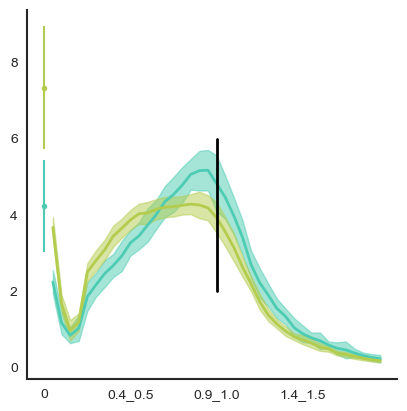

In [317]:
# plot data

plotColor = [[0.3,0.8, 0.7],[0.7, 0.8, 0.3]]
varNames = ['dropError','distanceError','angleError']
fig_path = "F:\\project\\navigationParadigm\\MorrisMaze\\materials\\manuscript\\figures\\OutputUsingPython"
fig_name = "under estimation ratio_distribution"
saveFigure = os.path.join(fig_path+"\\"+fig_name)
xtick_text = []
xtick_text.append('0')
for tmpidx in range(binNoAll-1):
    xtick_text.append(str(bins[tmpidx])[:3] + '_' + str(bins[tmpidx+1])[:3])
xtick_num = np.array(np.linspace(0,binNoAll,5))
xtick_num1 = []
xtick_num_label = []
for idx in xtick_num:
    print(int(idx))
    if idx<binNoAll:
        xtick_num1.append(idx)
        xtick_num_label.append(xtick_text[int(idx)])

plt.clf
f1 = plt.figure()

tmpx = np.array(range(binNoAll))
for geneNo in range(2):
    tmp_idx = np.where(data_gene[:,0] == geneNo+1)[0]
    data_tmp1 = np.squeeze(data_tmp[tmp_idx,:,1])
    
    tmpy = np.nanmean(data_tmp1,axis = 0)
    tmpy = savgol_filter(tmpy,10,3)
    print(tmpy.shape)
    print(tmpx.shape)
    print(data_tmp.shape)
    tmp_se = np.nanstd(data_tmp1,axis = 0)/np.sqrt(len(tmp_idx))

    plt.plot(tmpx[0],tmpy[0],'-',c = plotColor[geneNo], 
             lw = 2,mec = plotColor[geneNo], mfc=plotColor[geneNo])
    plt.errorbar(tmpx[0],tmpy[0],tmp_se[0],
                 label=None,c=plotColor[geneNo],ecolor=plotColor[geneNo],marker='.',ls='')
    
    plt.plot(tmpx[1:],tmpy[1:],ls = '-',color = plotColor[geneNo], lw = 2)
    plt.fill_between(tmpx[1:],tmpy[1:]-tmp_se[1:],tmpy[1:]+tmp_se[1:], 
                             alpha = 0.5, edgecolor = plotColor[geneNo], 
                             facecolor = plotColor[geneNo],lw=1,ls='-')

    
plt.xticks(xtick_num1, xtick_num_label) 
ax = plt.gca() #you first need to get the axis handle
x_left, x_right = ax.get_xlim()
y_low, y_high = ax.get_ylim()
ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*axisAspect)
#plt.plot(np.full((10,1),binNoAll/2), np.array(np.linspace(7.5,15,10)),'k-',lw=2)
plt.plot(np.full((10,1),binNoAll/2), np.array(np.linspace(2,6,10)),'k-',lw=2)

# remove box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(1.5)
    
plt.savefig(saveFigure)
plt.show()

In [318]:
import scipy.stats as stats

In [319]:
# perform a two-samples t test between APOE4 carriers and non-carriers
geneNo = 1
tmp_idx = np.where(data_gene[:,0] == geneNo)[0]
data_carriers = np.squeeze(data_tmp[tmp_idx,:,1])
geneNo = 2
tmp_idx = np.where(data_gene[:,0] == geneNo)[0]
data_noncarriers = np.squeeze(data_tmp[tmp_idx,:,1])
stats_results = stats.ttest_ind(data_carriers,data_noncarriers)


In [320]:
print(stats_results)

TtestResult(statistic=array([-1.37669548, -0.80551257, -1.0980928 , -2.10420969, -0.29648433,
       -0.88106053, -1.76391253, -1.10486721, -2.3781777 , -1.24809502,
       -0.7211919 , -1.47152231, -1.36986998, -0.29724162, -0.03593241,
       -0.02404756,  2.06349453,  1.27259465,  1.06782236,  0.51143108,
        1.96987335,  1.99575342,  0.56689493,  1.71021171,  1.07336763,
        1.49159185,  1.78822595,  2.50298942,  0.41129645,  2.73542629,
        0.39617064,  0.70966853,  0.82519325, -0.86282839,  2.07901176,
        1.64113442,  0.4058691 , -0.16255266,  0.25473546,  1.10424455]), pvalue=array([0.17159158, 0.42237964, 0.27472431, 0.03779434, 0.76745724,
       0.38033636, 0.08071169, 0.2717914 , 0.01924222, 0.21482607,
       0.47242529, 0.14419868, 0.17370636, 0.76688069, 0.9714058 ,
       0.9808612 , 0.04158014, 0.20602714, 0.288097  , 0.61014389,
       0.051538  , 0.04860091, 0.57201892, 0.0902374 , 0.28561448,
       0.13886263, 0.0766798 , 0.01388656, 0.68170971, 0.0